<a href="https://colab.research.google.com/github/VicariousVision/classification-predict-streamlit-template/blob/master/CB5_Team_Notebook(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




 <font size="8"> **Climate Change Belief Analysis**</font> 

<br />

<center> <img src="https://explore-datascience.net/images/images_admissions2/main-logo.jpg" width=800 height=200 />

<br />

 <font size="5"> **Team Members**</font>



*   Kamogelo Potjane Makhuloane
*   Mapula Tlhompho Victoria Maponya

*   Menzi Khathwane
*   Njabulo Mkhwanazi

*   Ozzey Padayachee
*   Thapelo Nkhumishe


<font size="5"> **Table of Content**</font> 

>[Import Libraries](#scrollTo=E9Cx7SCGp1rm)

>[Introduction](#scrollTo=WvhHTiH5Cgj0)

>[Data collection](#scrollTo=WzvURdwd7PeE)

>[Understanding the data](#scrollTo=aa3U9_2-22PK)

>[Natural Language Processing (NLP)](#scrollTo=iF4THLBFu59I)

>>>>[Text data cleaning](#scrollTo=tyhOfKqsdESL)

>>>>[Text feature extraction](#scrollTo=NTkdvNmPdvGR)

>[Exploratory Data Analysis (EDA)](#scrollTo=CDihTBx7wOVA)

>>[Analysis](#scrollTo=iXe9z3oJyrB2)

>>[Term frequency analysis](#scrollTo=Vo0PTIAFYOhD)

>[Pre-Processing](#scrollTo=7iC0DTz1wUf8)

>>[Transforming text into numbers](#scrollTo=QN23TxgWlV6i)

>[Dealing with Class Imbalance](#scrollTo=cLn3gTj_dL_O)

>>[Upsampling](#scrollTo=FR2IuXO38kDd)

>[Modelling](#scrollTo=jm556ZkzrksN)

>[Feature Engineering in test dataset](#scrollTo=HXNSGp84DxXD)

>[Text feature extraction in  test dataset](#scrollTo=ZW53vpG6gvj0)

>[Test data Pre-processing](#scrollTo=Bz6AwXm--4LC)

>[Submission](#scrollTo=WayCYzQ5R1TX)



# **Import Libraries**

Let's import nltk and other necessary packages for our predict, usefull for visuals, modeling, pre-processing and so on.

In [1]:
import nltk  # Natural Language Toolkit library for building Python programs to work with human language data.

import numpy as np # library for numerical algebra 
import pandas as pd # library for working with DataFrames 
import matplotlib.pyplot as plt # library useful for visuals or plotting
from matplotlib.colors import ListedColormap
import seaborn as sns 
import re

import nltk
import pickle
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, log_loss
from sklearn import metrics
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# set plot style
sns.set()

***Downloading NLTK Corpora***

In [2]:

#you can download it directly, i.e.
nltk.download(['punkt','stopwords'])
nltk.download('omw-1.4')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

If the download was successful, then the import below should work:

In [3]:
from nltk.corpus import stopwords

***Let's take a quick look at what we've downloaded***

In [4]:
stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# **Introduction**


Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change (see, figure bellow) and whether or not they believe it is a real threat . This would add to their market research efforts in gauging how their product/service may be received. The task of this predict is to create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories.thus increasing their insights and informing future marketing strategies.



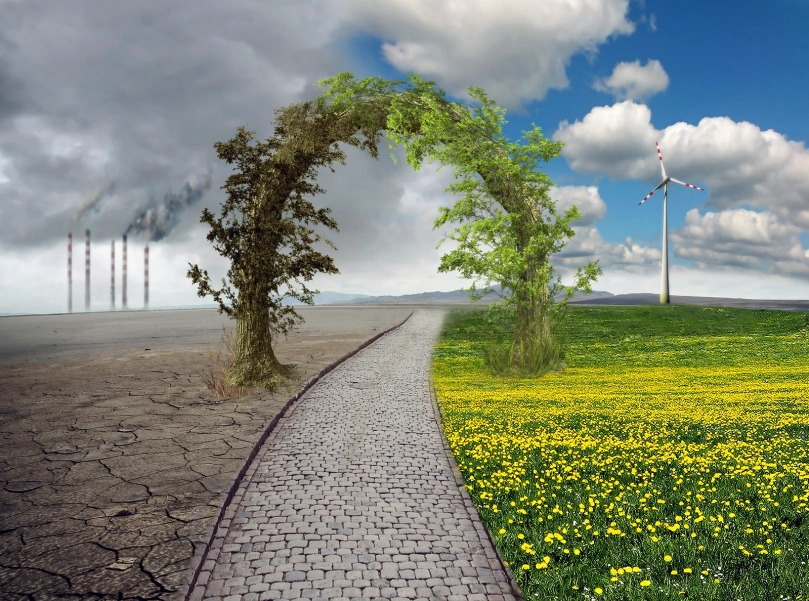

# **Data collection**

The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected.

***Let now load the data using pandas***


In [5]:
train_df = pd.read_csv('https://raw.githubusercontent.com/njabulomkhwanazi52/CB5_class_repo/main/train.csv') # Load the train dataset

In [6]:
test_df = pd.read_csv('https://raw.githubusercontent.com/njabulomkhwanazi52/CB5_class_repo/main/test_with_no_labels.csv') #Load the test dataset

# **Understanding the data** 
** **
***sentiment feature description***
 
 - 0 &rarr;  **Neutral**: the tweet neither supports nor refutes the belief of man-made climate change.
 - 1 &rarr;  **Pro**: the tweet supports the belief of man-made climate change.
 - 2 &rarr;  **News**: the tweet links to factual news about climate change.
 - -1 &rarr; **Anti**: the tweet does not believe in man-made climate change.
** **
 
***Features in train dataset***
This dataset consists of the following Columns: 

 - sentiments &rarr; Sentiment type that each tweet can be characterised as mentioned above.
 - message    &rarr; Novel tweet data.
 - tweetid    &rarr; Tweet unique id.

# **Natural Language Processing (NLP)**

**[NLP](https://realpython.com/nltk-nlp-python/)** refers to the branch of computer science, more specifically, the branch of artificial intelligence concerned with giving computers the ability to understand text and spoken words in much the same way human beings can. The concepts covered here are very useful for text analysis.

In [7]:
# view/ look at first five rows by default
train_df.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

Let’s see if there are any null values present in our dataset:

In [8]:
train_df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

Print off a list of all the sentiment which are present in this train_df dataset.

In [9]:
sentiment_labels = list(train_df.sentiment.unique())
print(sentiment_labels)

[1, 2, 0, -1]


Let's have a look at how many data samples we have for each of the different sentiment.

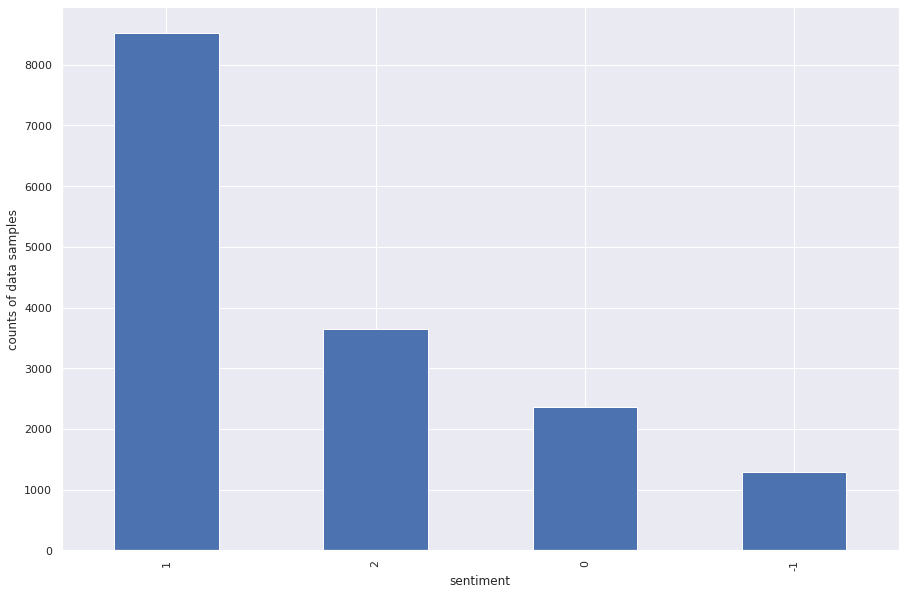

In [10]:
plt.figure(figsize=(15,10))
train_df['sentiment'].value_counts().plot(kind = 'bar')
plt.xlabel('sentiment')
plt.ylabel('counts of data samples')
plt.show()

In [11]:
# how many rows do we have now?
train_df.shape

(15819, 3)

#### **Text data cleaning**



In context of text analytics, removing noise (that is. unneccesary information) is a vital part of getting the data into a usable format. For the train  dataset we will be doing the following steps:



*   making everything lower case
*   removing punctuation
*   removing the web-urls
*   removing digits and words containing digits
*   removing all websites and replace them with the text 'web-url'
*   remmoving the urls, Re Tweets, mentions, Hashtags, https, emojis, charecters



**Removing noise**

***Let us remove all websites and replaces them with the text 'web-url'***

In [12]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train_df['message'] = train_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [13]:
#now view the data
train_df.head()
display(train_df.head())

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

* ***Convert to lower case***

In [14]:
import string
train_df['message'] = train_df['message'].str.lower() 

In [15]:
train_df[['message']].head() # Have a look at message column now all rows in lower case

message
0  polyscimajor epa chief doesn't think carbon di...
1  it's not like we lack evidence of anthropogeni...
2  rt @rawstory: researchers say we have three ye...
3  #todayinmaker# wired : 2016 was a pivotal year...
4  rt @soynoviodetodas: it's 2016, and a racist, ...

* ***Remove digits and words containing digits***

we need to remove numbers and words containing digits from the reviews. This is done because digits and words containing digits do not give much importance to the main words. 

In [16]:
# To do this we use lambda functions.
train_df['message']=train_df['message'].apply(lambda x: re.sub('\w*\d\w*','', x))

* ***Panctuation removal***

Now let's remove the punctuation using the string import.

In [17]:
print(string.punctuation) # First let us print the punctuation 

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [18]:
def punctuation_removal(message):
    return ''.join([i for i in message if i not in string.punctuation])

In [19]:
train_df['message'] = train_df['message'].apply(punctuation_removal)
train_df[['message']].head()

message
0  polyscimajor epa chief doesnt think carbon dio...
1  its not like we lack evidence of anthropogenic...
2  rt rawstory researchers say we have three year...
3  todayinmaker wired   was a pivotal year in the...
4  rt soynoviodetodas its  and a racist sexist cl...

* ***remmoving the urls, Re Tweets, mentions, Hashtags, https, emojis, charecters***

In [20]:
#remmoving the urls
pattern_url = r'http[s]?://[A-Za-z0-9/.]+'
subs_url = r'url-web'
train_df['message']= train_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#Makes sure only letters are in the message
pattern_url=re.sub('[^a-zA-Z]',' ',pattern_url)  
    
#remmoving the Re Tweets 
pattern_url = r'rt\s'
subs_url = r''
train_df['message'] = train_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)


#remmoving the remaining https
pattern_url = r'https:[.*?]+'
subs_url = r''
train_df['message'] = train_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

# Removing the emojis using the apply method

def remove_emojis(string):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', string)

train_df['message'] = train_df['message'].apply(remove_emojis)



#remmoving the uknown charecters from words
pattern_url = r'[^A-Za-z ]'
subs_url = r''
train_df['message'] = train_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [21]:
def tweet_cleaner(tweet):
    
    """
    This function is necessary for removing url's, mentions, hashtags, 
    punctuation, numbers and any extra white space from tweets after converting 
    everything to lowercase letters.
    
    """
    # Convert everything to lowercase
    tweet = tweet.lower() 
    
    # Remove mentions   
    tweet = re.sub('@[\w]*','',tweet)  
    
    # Remove url's
    tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
    
    # Remove hashtags
    tweet = re.sub(r'#\w*', '', tweet)    
    
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)  
    
    # Remove punctuation
    tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", ' ', tweet)
    
    # Remove that funny diamond
    tweet = re.sub(r"U+FFFD ", ' ', tweet)
    
    # Remove extra whitespace
    tweet = re.sub(r'\s\s+', ' ', tweet)
    
    # Remove space in front of tweet
    tweet = tweet.lstrip(' ')                        
    
    return tweet

# Clean the tweets in the message column
train_df['message'] = train_df['message'].apply(tweet_cleaner)
train_df['message'] = train_df['message'].apply(tweet_cleaner)

Next, we have a look at clean text thus far.

In [22]:
train_df.head()

sentiment                                            message  tweetid
0          1  polyscimajor epa chief doesnt think carbon dio...   625221
1          1  its not like we lack evidence of anthropogenic...   126103
2          2  rawstory researchers say we have three years t...   698562
3          1  todayinmaker wired was a pivotal year in the w...   573736
4          1  soynoviodetodas its and a racist sexist climat...   466954

* ***Tokenization***

**[Tokenization](https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/)** is a simple process that takes raw data and converts it into a useful data string.Tokenization is used in NLP to split paragraphs and sentences into smaller units (i.e, Tokens) that can be more easily assigned meaning. The first step of the NLP process is gathering the data (a sentence) and breaking it into understandable parts (words).

We do tokenization because if we will be having the words and sentences differently then we can reach to each and every word and sentence and can have insights from each and every word or sentence. For exmample, look at the figure below (adapted online [here](https://medium.com/@aadityamonu67/part-2-tokenization-nlp-c36ccfcbb381)).

<br />

<center> <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRut7ItiREnje6W3fX-NrizokGenW6M5DA0NQ&usqp=CAU" width=500 height=*200* />

<br />



In [23]:
#word tokenize
from nltk.tokenize import word_tokenize
tokenized_train_df = [word_tokenize(word) for word in train_df['message']]

In [24]:
print(tokenized_train_df)

[['polyscimajor', 'epa', 'chief', 'doesnt', 'think', 'carbon', 'dioxide', 'is', 'main', 'cause', 'of', 'global', 'warming', 'and', 'wait', 'what', 'urlweb', 'via', 'mashable'], ['its', 'not', 'like', 'we', 'lack', 'evidence', 'of', 'anthropogenic', 'global', 'warming'], ['rawstory', 'researchers', 'say', 'we', 'have', 'three', 'years', 'to', 'act', 'on', 'climate', 'change', 'before', 'its', 'too', 'late', 'urlweb', 'urlweb'], ['todayinmaker', 'wired', 'was', 'a', 'pivotal', 'year', 'in', 'the', 'war', 'on', 'climate', 'change', 'urlweb'], ['soynoviodetodas', 'its', 'and', 'a', 'racist', 'sexist', 'climate', 'change', 'denying', 'bigot', 'is', 'leading', 'in', 'the', 'polls', 'electionnight'], ['worth', 'a', 'read', 'whether', 'you', 'do', 'or', 'dont', 'believe', 'in', 'climate', 'change', 'urlweb', 'urlweb'], ['thenation', 'mike', 'pence', 'doesnt', 'believe', 'in', 'global', 'warming', 'or', 'that', 'smoking', 'causes', 'lung', 'cancer', 'urlweb'], ['makeandmendlife', 'six', 'big', 

In [25]:
# we will use TreebankWordTokenizer since it is much quicker than the word_tokenize function
from nltk.tokenize import TreebankWordTokenizer

tokeniser = TreebankWordTokenizer()
train_df['tokens'] = train_df['message'].apply(tokeniser.tokenize)

In [26]:
train_df[['tokens']].head()

tokens
0  [polyscimajor, epa, chief, doesnt, think, carb...
1  [its, not, like, we, lack, evidence, of, anthr...
2  [rawstory, researchers, say, we, have, three, ...
3  [todayinmaker, wired, was, a, pivotal, year, i...
4  [soynoviodetodas, its, and, a, racist, sexist,...

* ***Stemming and Lemmatization***

The image below is adapted online [here](https://analyticsindiamag.com/explained-stemming-vs-lemmatization-in-nlp/), it serves a purpose of differentiating between **[Stemming](https://www.analyticsvidhya.com/blog/2021/11/an-introduction-to-stemming-in-natural-language-processing/)** and **[Lemmatization](https://www.geeksforgeeks.org/python-lemmatization-with-nltk/)**.

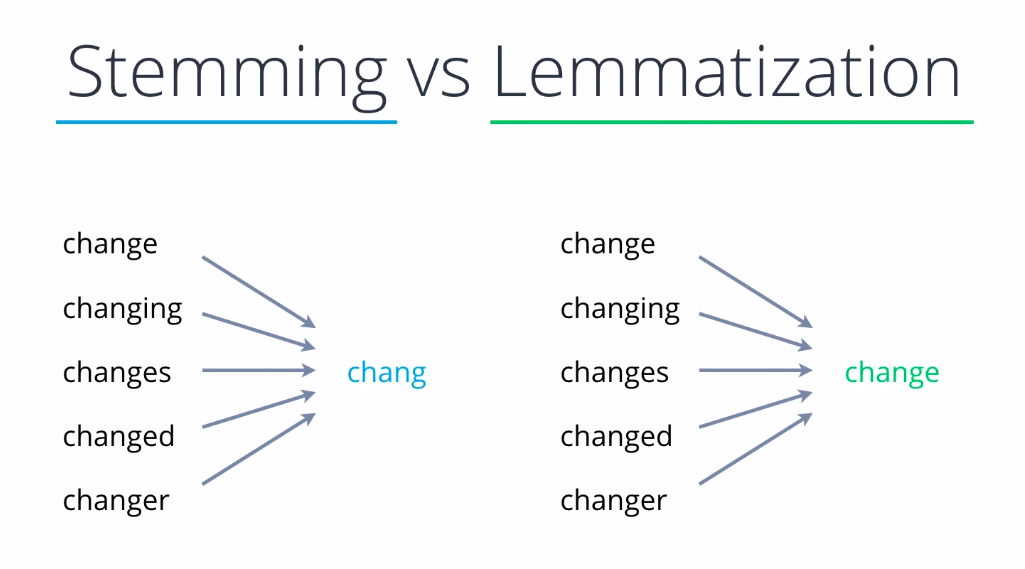
























































a) *Stemming*


**Stemming** is the process of transforming to the root word. 
It uses an algorithm that removes common word-endings from English words, such as “ly,” “es,” “ed,” and “s.” In general, the advantages of stemming are that it's straightforward to implement and fast to run. The trade-off here is that the output might contain inaccuracies.

In [27]:
# we will use stemming algorithm known as Snowball in this notebook.
from nltk import SnowballStemmer

Let us stem all of the words in the train dataframe.

In [28]:
stemmer = SnowballStemmer('english')

In [29]:
def train_df_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [30]:
train_df['stem'] = train_df['tokens'].apply(train_df_stemmer, args=(stemmer, ))

In [31]:
# Now print what we have done so far using stemmer.

train_df[['tokens','stem']].head()

tokens  \
0  [polyscimajor, epa, chief, doesnt, think, carb...   
1  [its, not, like, we, lack, evidence, of, anthr...   
2  [rawstory, researchers, say, we, have, three, ...   
3  [todayinmaker, wired, was, a, pivotal, year, i...   
4  [soynoviodetodas, its, and, a, racist, sexist,...   

                                                stem  
0  [polyscimajor, epa, chief, doesnt, think, carb...  
1  [it, not, like, we, lack, evid, of, anthropoge...  
2  [rawstori, research, say, we, have, three, yea...  
3  [todayinmak, wire, was, a, pivot, year, in, th...  
4  [soynoviodetoda, it, and, a, racist, sexist, c...

b) *Lemmatization*

Lemmatization refers to the act of grouping together words that have the same root or lemma but have different inflections or derivatives of meaning so they can be analyzed as one item. Further, this process allows to decrease noise and speed up the user’s task.


In [32]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Let us lemmatize all of the words in the train dataframe.

In [33]:
def train_df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

In [34]:
train_df['lemma'] = train_df['tokens'].apply(train_df_lemma, args=(lemmatizer, ))

In [35]:
# Now print what we have done so far using lemmatizer.

train_df[['tokens','lemma']].head()

tokens  \
0  [polyscimajor, epa, chief, doesnt, think, carb...   
1  [its, not, like, we, lack, evidence, of, anthr...   
2  [rawstory, researchers, say, we, have, three, ...   
3  [todayinmaker, wired, was, a, pivotal, year, i...   
4  [soynoviodetodas, its, and, a, racist, sexist,...   

                                               lemma  
0  [polyscimajor, epa, chief, doesnt, think, carb...  
1  [it, not, like, we, lack, evidence, of, anthro...  
2  [rawstory, researcher, say, we, have, three, y...  
3  [todayinmaker, wired, wa, a, pivotal, year, in...  
4  [soynoviodetodas, it, and, a, racist, sexist, ...

* ***Removing stopwords***

**[Stopwords](https://erraticcoder.com/2021/12/29/stopwords-in-nlp-python/)** are words that you want to ignore, so you filter them out of your text when you’re processing it. Very common words like 'in', 'is', and 'an' are often used as stop words since they don’t add a lot of meaning to a text in and of themselves. some of the Stopwords shown in figure below (adapted online [here](https://erraticcoder.com/2021/12/29/stopwords-in-nlp-python/)).



<br />

<center> <img src="https://erraticcoder.files.wordpress.com/2021/12/stopwords.png?w=350&h=200&crop=1" width=800 height=*200* />

<br />

In [36]:
"""
Stop words are commonly used in Text Mining and Natural Language Processing (NLP)
to eliminate words that are so commonly used that they carry very little useful information.
"""

from nltk.corpus import stopwords
print(stopwords.words('english')[0:30]) # let us view the so-called stopwords

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself']


In [37]:
sorted(stopwords.words('english'))[0:10] # sort the list A-Z and print first 10 items

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an']

In [38]:
def remove_stop_words(tokens):
    return [t for t in tokens if t not in stopwords.words('english')]

In [39]:
 train_df['lemma'] = train_df['tokens'].apply(remove_stop_words)

In [40]:
# Now let us use veiw our lemmatization in DataFrame thus far
train_df[['tokens','lemma']].head()

tokens  \
0  [polyscimajor, epa, chief, doesnt, think, carb...   
1  [its, not, like, we, lack, evidence, of, anthr...   
2  [rawstory, researchers, say, we, have, three, ...   
3  [todayinmaker, wired, was, a, pivotal, year, i...   
4  [soynoviodetodas, its, and, a, racist, sexist,...   

                                               lemma  
0  [polyscimajor, epa, chief, doesnt, think, carb...  
1  [like, lack, evidence, anthropogenic, global, ...  
2  [rawstory, researchers, say, three, years, act...  
3  [todayinmaker, wired, pivotal, year, war, clim...  
4  [soynoviodetodas, racist, sexist, climate, cha...

#### **Text feature extraction**

**Text feature extraction** is the process of transforming what is essentially a list of words into a feature set that is usable by a classifier.

***Bag of words***

 Bag of Words model constructs a word presence feature set from all the words in the text, indicating the number of times each word has appeared.

In [41]:
def bag_of_words_count(words, word_dict={}):
    """ 
    this function takes in a list of words and returns a dictionary 
    with each word as a key, and the value represents the number of 
    times that word has appeared
    """
    for word in words:
        if word in word_dict.keys():
            word_dict[word] = word_dict[word] + 1
        else:
            word_dict[word] = 1
    return word_dict


Let see unique sentiments 

In [42]:
type_labels = train_df.sentiment.unique() 

Now we create a set of dictionaries, one for each of the train_df sentiment.

In [43]:
msg = {}
for i in sentiment_labels:
    df = train_df.groupby('sentiment')
    msg[i] = {}
    for row in df.get_group(i)['tokens']:
        msg[i] = bag_of_words_count(row, msg[i])

The next step is to create a list of all of the unique words.

In [44]:
all_words = set()
for i in sentiment_labels:
    for word in msg[i]:
        all_words.add(word)

This was done so that we can create a combined bag of words dictionary for all the words in the text.

In [45]:
msg['all'] = {}
for i in sentiment_labels:
    for word in all_words:
        if word in msg[i].keys():
            if word in msg['all']:
                msg['all'][word] += msg[i][word]
            else:
                msg['all'][word] = msg[i][word]

In [46]:
# Now we can easily calculate how many words there are in total.

In [47]:
sum_words = sum([j for j in msg['all'].values()])
sum_words


261687

Let's explore the frequeny of words which occur less than 10 times in the whole train dataset.

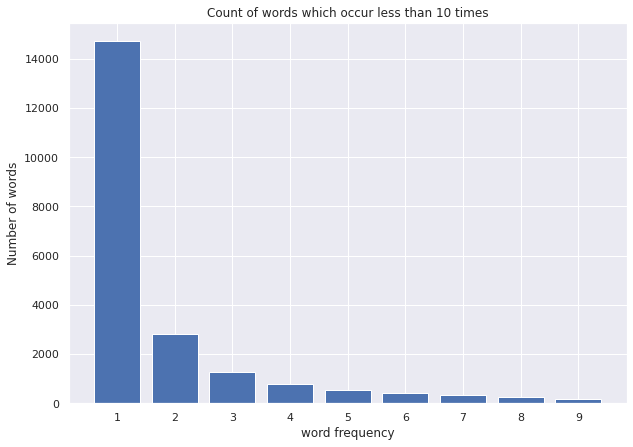

In [48]:
arr = np.array([j for j in msg['all'].values() if j < 10])
labels, counts = np.unique(arr, return_counts=True)
plt.figure(figsize=(10,7))
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.ylabel("Number of words")
plt.title("Count of words which occur less than 10 times")
plt.xlabel("word frequency")
plt.show()

Let us observe the number of words that only appear once.

In [49]:
len([j for j in msg['all'].values() if j == 1]) # length function is used in this case

14724

Words that we think would appear once out of roughly 280 thousand words.

Let's print out a few of these rare words.


In [50]:
appear_once = [k for k, j in msg['all'].items() if j==1] 
pd.DataFrame (appear_once[:20], columns = ['rare words'])

rare words
0             waldojaquith
1                geologist
2            resourceshttp
3   globalcovenantofmayors
4                 smacking
5                    ebola
6         realconservative
7              indigocathy
8             clarebuttner
9            climateenergy
10          administrators
11                  trains
12              wilsonpark
13                khurshid
14               zachmider
15              annotation
16                  dayjob
17                  louise
18          weneedfeminlsm
19                eilfretz

In the above dataframe of rare words, some of these words dont make sence at all. 

So before we remove them let us see the amount of data will be left with after the whole process.

In [51]:

print(len([j for j in msg['all'].values() if j >= 10])) # No. words that appear more than 10 times?
occurs_more_than_10_times = sum([j for j in msg['all'].values() if j >= 10]) 
print(occurs_more_than_10_times)

2371
223144


In [52]:
# how many words of the total does that account for?

In [53]:
occurs_more_than_10_times/sum_words

0.8527133560322064

Employing words that appear more than 10 times seems much more useful!, thus this accounts for 85% of all the words!

Now, let's remove all words that occur less than 10 times.

In [54]:
max_count = 10
remaining_word_index = [k for k, j in msg['all'].items() if j > max_count]

# **Exploratory Data Analysis (EDA)**

**EDA** is a crucial step to take before diving into machine learning model because it provides the context needed to develop an appropriate model for the problem at hand and to correctly interpret its results. Exploratory Data Analysis is an approach for Data Analysis that employs a variety of techniques to:

* Gain intuition about the data.
* Find out where data is missing.
* Summarize the data.


Let's display few rows in our dataset thus far


In [55]:
train_df.head(5)

sentiment                                            message  tweetid  \
0          1  polyscimajor epa chief doesnt think carbon dio...   625221   
1          1  its not like we lack evidence of anthropogenic...   126103   
2          2  rawstory researchers say we have three years t...   698562   
3          1  todayinmaker wired was a pivotal year in the w...   573736   
4          1  soynoviodetodas its and a racist sexist climat...   466954   

                                              tokens  \
0  [polyscimajor, epa, chief, doesnt, think, carb...   
1  [its, not, like, we, lack, evidence, of, anthr...   
2  [rawstory, researchers, say, we, have, three, ...   
3  [todayinmaker, wired, was, a, pivotal, year, i...   
4  [soynoviodetodas, its, and, a, racist, sexist,...   

                                                stem  \
0  [polyscimajor, epa, chief, doesnt, think, carb...   
1  [it, not, like, we, lack, evid, of, anthropoge...   
2  [rawstori, research, say, we, have, three, yea...   
3  [todayinmak, wire, was, a, pivot, year, in, th...   
4  [soynoviodetoda, it, and, a, racist, sexist, c...   

                                               lemma  
0  [polyscimajor, epa, chief, doesnt, think, carb...  
1  [like, lack, evidence, anthropogenic, global, ...  
2  [rawstory, researchers, say, three, years, act...  
3  [todayinmaker, wired, pivotal, year, war, clim...  
4  [soynoviodetodas, racist, sexist, climate, cha...

Data types of the various columns

In [56]:
# Let us observe datatypes in our dataset

train_df.dtypes

sentiment     int64
message      object
tweetid       int64
tokens       object
stem         object
lemma        object
dtype: object

## **Analysis**

Sentiment requires a string but our “lemmatized” column is currently a list. 
Let’s convert the list into a string.

In [57]:
train_df['lemma_str'] = [' '.join(map(str,l)) for l in train_df['lemma']]
train_df[['lemma_str']].head()

lemma_str
0  polyscimajor epa chief doesnt think carbon dio...
1    like lack evidence anthropogenic global warming
2  rawstory researchers say three years act clima...
3  todayinmaker wired pivotal year war climate ch...
4  soynoviodetodas racist sexist climate change d...

Let us look at each sentiment frequency 

In [58]:
#Creating a copy of the the tweet dataframe,where we will create a dictionary of the sentiments class
train_df_copy = train_df.copy()
#Create a dictionary of the sentiments
sentiment_class = {-1: "Anti", 0: "Neutral", 1: "Pro", 2: "News"}
train_df_copy["sentiment"] = train_df["sentiment"].apply(lambda num: sentiment_class[num])

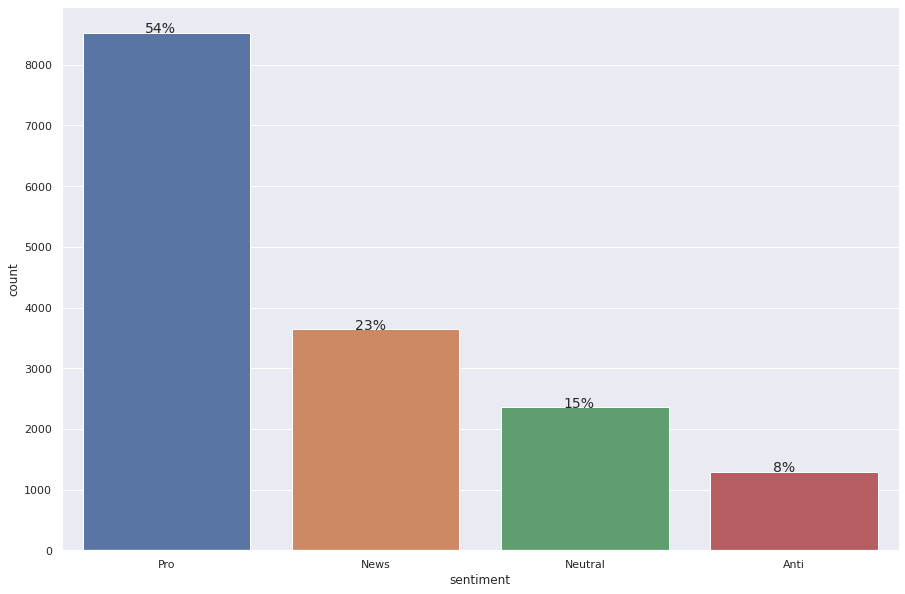

In [59]:
response = train_df_copy['sentiment'] # Targets variable

#Creating a countplot for the features
sns.set(rc={'figure.figsize':(15,10)})
ax=sns.countplot(x=response, data=train_df_copy)

total = len(response) # length of the column
for p in ax.patches:
    percentage = '{:.0f}%'.format(100 * p.get_height()/total) # percentage of each sentiment class
    x = p.get_x() + p.get_width() / 2 - 0.1     # width of the plot
    y = p.get_y() + p.get_height()  # heightt of the plot
    ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
    
plt.show() # show the plot

Sentiment distribution in form of pie chart

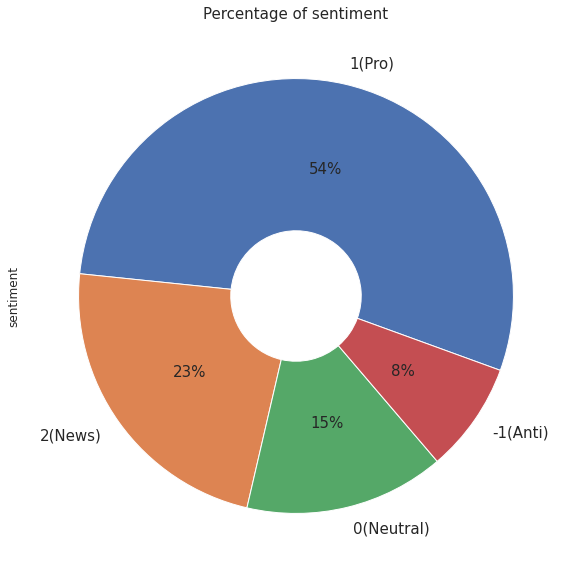

In [60]:
plt.figure(figsize=(15,10))
plt.title('Percentage of sentiment', fontsize=15)
train_df.sentiment.value_counts().plot(kind='pie', labels=['1(Pro)', '2(News)', '0(Neutral)', '-1(Anti)'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

Let’s create two additional features of “word_count” to determine the number of words per review and “tweets_len” to determine the number of letters per tweet.

In [61]:
train_df['word_count'] = train_df['lemma'].apply(lambda x: len(str(x).split()))
train_df['tweets_len'] = train_df['lemma_str'].astype(str).apply(len)

Let us plot the correlation

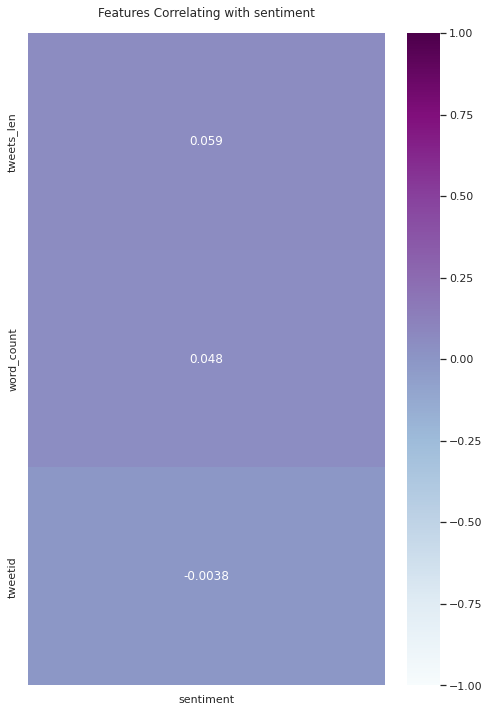

In [62]:
# plotting the heatmap showing the correlation between the target variable and all feature in train dataset.
sent_corr = train_df.corr()[['sentiment']].sort_values(by='sentiment', ascending=False)[1:]

fig = plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(sent_corr, vmin=-1, vmax=1, annot=True, cmap='BuPu')
heatmap.set_title('Features Correlating with sentiment', fontdict={'fontsize':12}, pad=16);

The distribution of the length tweet for each class

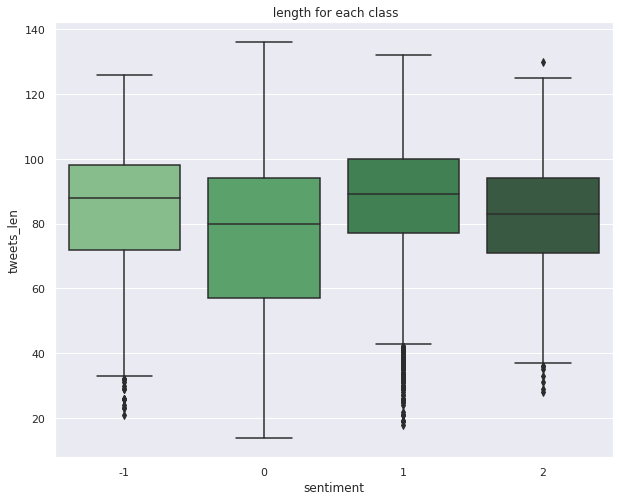

In [63]:
# Plot the distribution of the length tweets for each class using a box plot
plt.figure(figsize=(10,8))
sns.boxplot(x=train_df['sentiment'], y=train_df['tweets_len'], data=train_df, palette=("Greens_d"))
plt.title(' length for each class')
plt.show()

## **Term frequency analysis**

What are the most common words? What are the most common words by sentiment? Answers to these questions will provide further insights 

In [64]:
words = train_df['lemma']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

['polyscimajor', 'epa', 'chief', 'doesnt', 'think', 'carbon', 'dioxide', 'main', 'cause', 'global', 'warming', 'wait', 'urlweb', 'via', 'mashable', 'like', 'lack', 'evidence', 'anthropogenic', 'global', 'warming', 'rawstory', 'researchers', 'say', 'three', 'years', 'act', 'climate', 'change', 'late', 'urlweb', 'urlweb', 'todayinmaker', 'wired', 'pivotal', 'year', 'war', 'climate', 'change', 'urlweb', 'soynoviodetodas', 'racist', 'sexist', 'climate', 'change', 'denying', 'bigot', 'leading', 'polls', 'electionnight', 'worth', 'read', 'whether', 'dont', 'believe', 'climate', 'change', 'urlweb', 'urlweb', 'thenation', 'mike', 'pence', 'doesnt', 'believe', 'global', 'warming', 'smoking', 'causes', 'lung', 'cancer', 'urlweb', 'makeandmendlife', 'six', 'big', 'things', 'today', 'fight', 'climate', 'change', 'climate', 'activist', 'urlweb', 'h', 'aceofspadeshq', 'nephew', 'inconsolable', 'wants', 'die', 'old', 'age', 'like', 'perish', 'fiery', 'hellscape', 'climate', 'change', 'paigetweedy', '

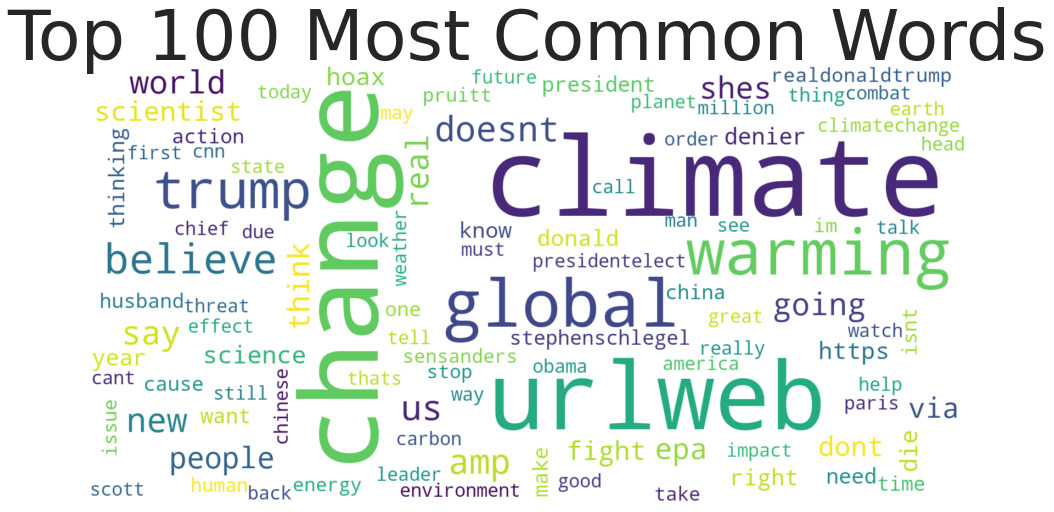

In [65]:
#This creates a list of single strings to generate the wordcloud.
df_words = pd.Series(train_df['lemma_str']).str.cat(sep=' ') 

wordcloud = WordCloud(width=1600,height=800,max_font_size=200,max_words=100,
                       collocations = False, background_color = 'white').generate(df_words)

plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Top 100 Most Common Words', fontsize=70)
plt.tight_layout(pad=0)
plt.show()

The plot visualising the frequency distribution for 25 most common words in the entire dataset.

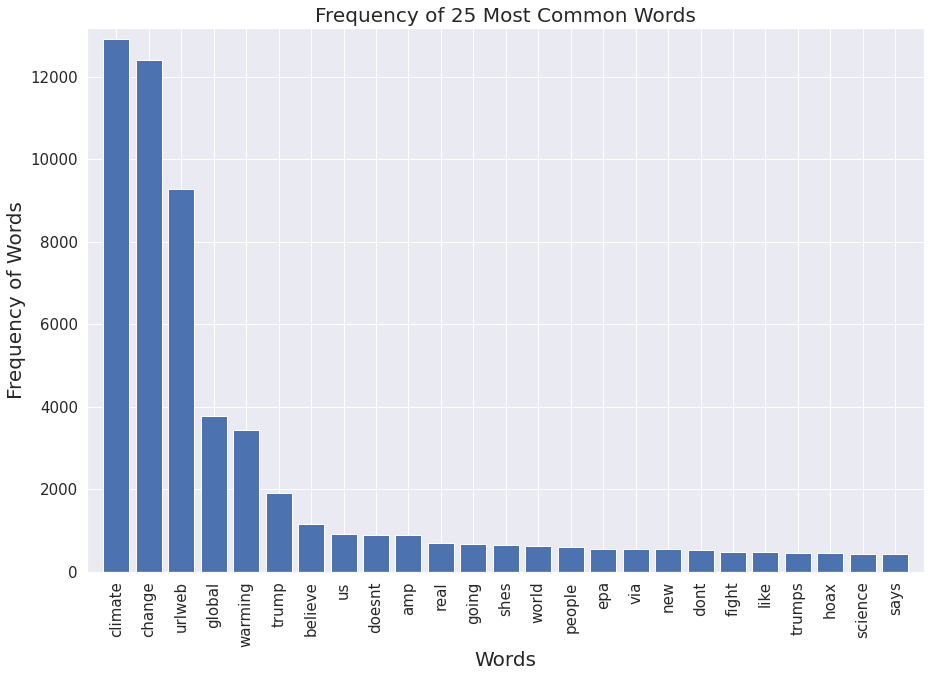

In [66]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(15,10))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.title('Frequency of 25 Most Common Words', fontsize=20)
plt.show()

Frequency of 25 Most Common Words for each sentiment (i.e, 1(Pro), 2(News), 0(Neutral), -1(Anti))

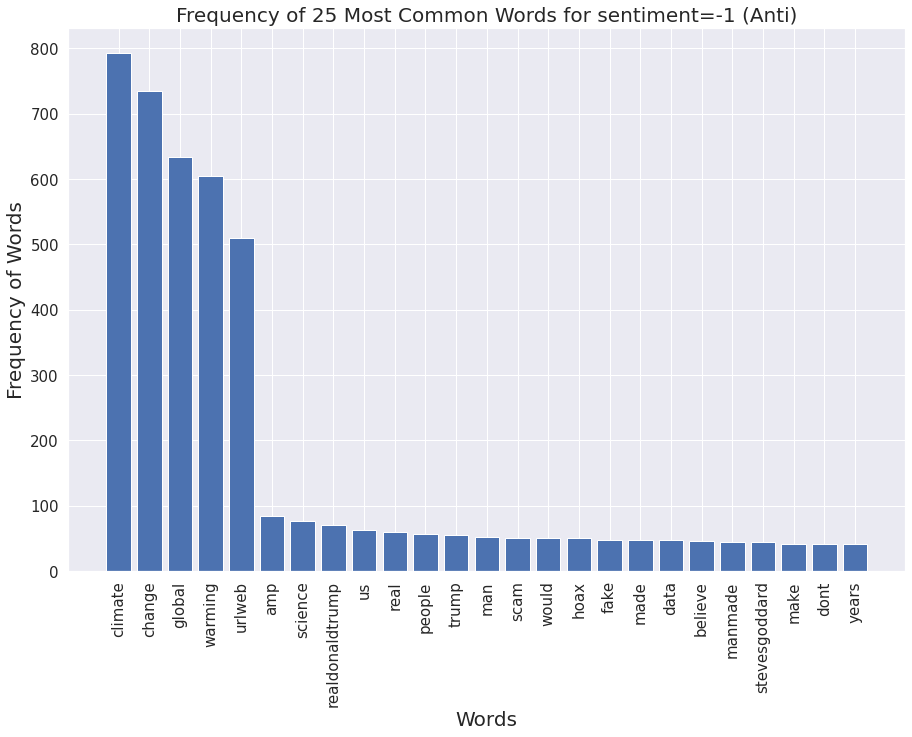

In [67]:
group_by = train_df.groupby('sentiment')['lemma_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))
group_by_0 = group_by.iloc[0]
words0 = list(zip(*group_by_0))[0]
freq0 = list(zip(*group_by_0))[1]
plt.figure(figsize=(15,10))
plt.bar(words0, freq0)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.title('Frequency of 25 Most Common Words for sentiment=-1 (Anti)', fontsize=20)
plt.show()

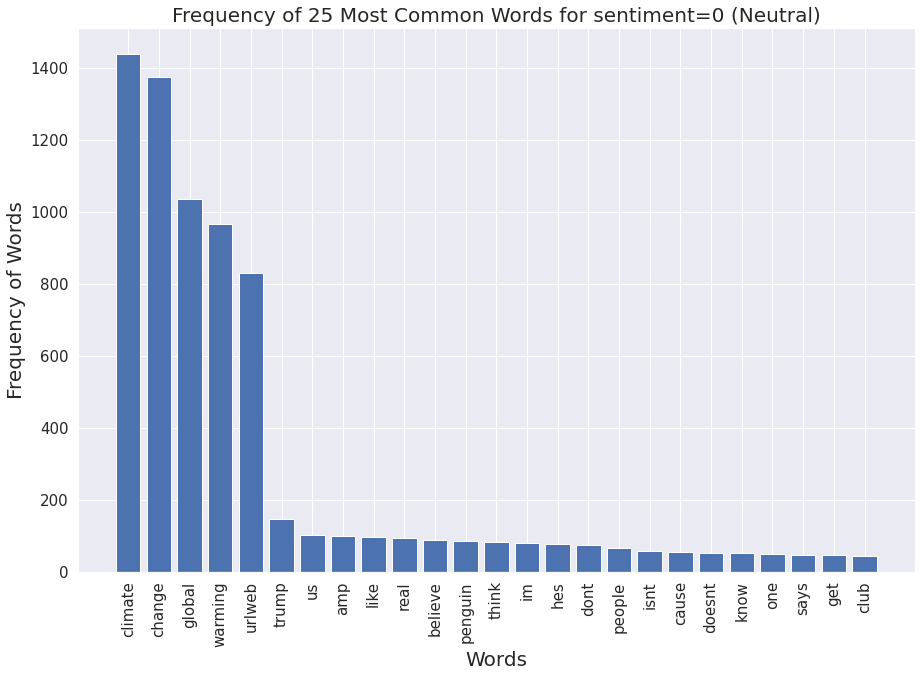

In [68]:
group_by_1 = group_by.iloc[1]
words1 = list(zip(*group_by_1))[0]
freq1 = list(zip(*group_by_1))[1]
plt.figure(figsize=(15,10))
plt.bar(words1, freq1)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.title('Frequency of 25 Most Common Words for sentiment=0 (Neutral)', fontsize=20)
plt.show()

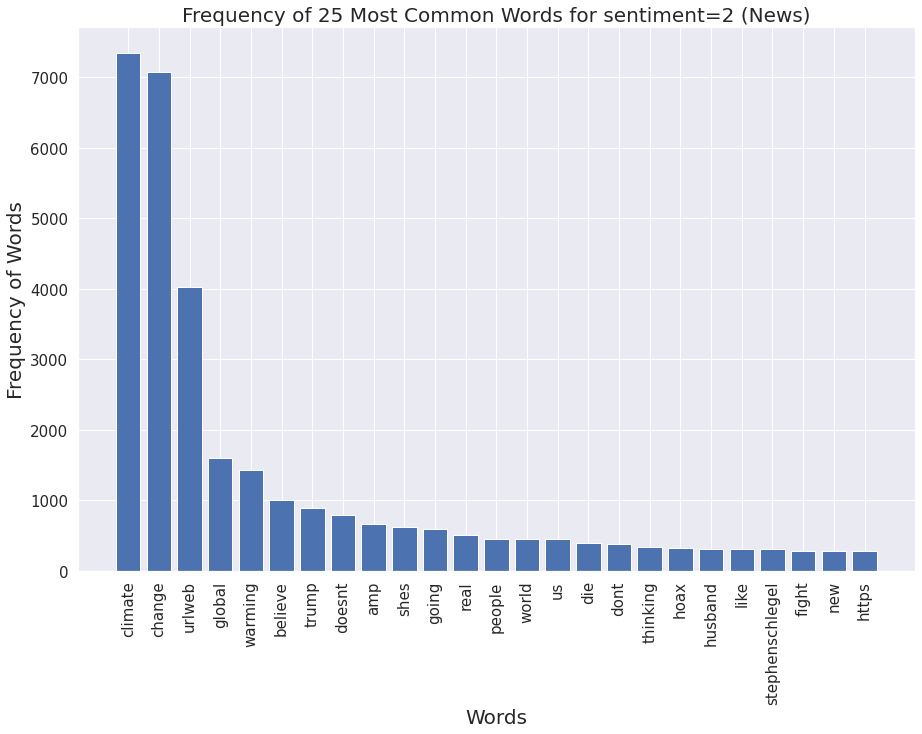

In [69]:
group_by_2 = group_by.iloc[2]
words2 = list(zip(*group_by_2))[0]
freq2 = list(zip(*group_by_2))[1]
plt.figure(figsize=(15,10))
plt.bar(words2, freq2)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.title('Frequency of 25 Most Common Words for sentiment=2 (News)', fontsize=20)
plt.show()

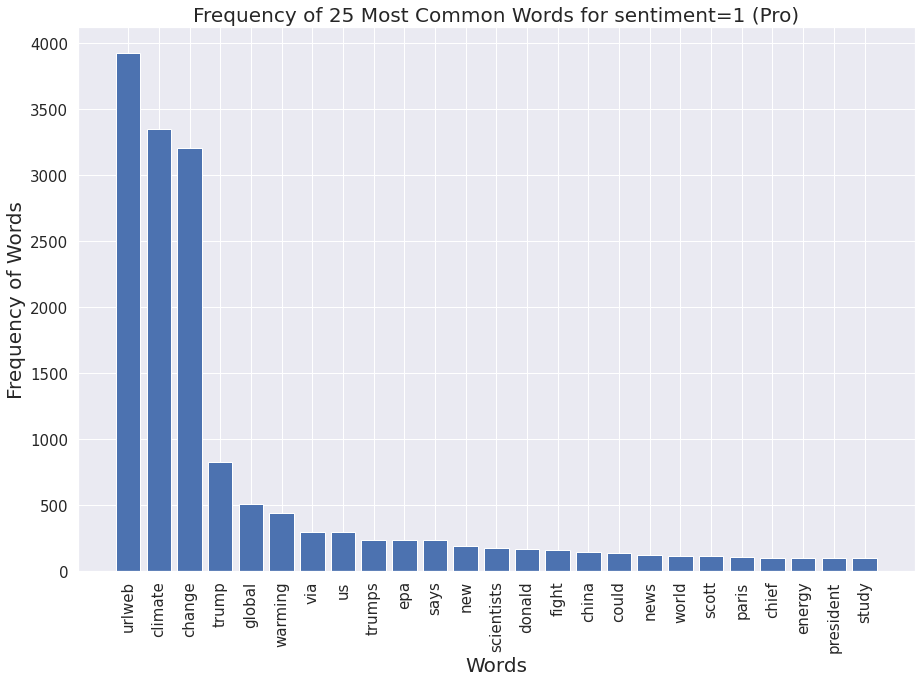

In [70]:
group_by_3 = group_by.iloc[3]
words3 = list(zip(*group_by_3))[0]
freq3 = list(zip(*group_by_3))[1]
plt.figure(figsize=(15,10))
plt.bar(words3, freq3)
plt.xlabel('Words', fontsize=20)
plt.ylabel('Frequency of Words', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.title('Frequency of 25 Most Common Words for sentiment=1 (Pro)', fontsize=20)
plt.show()

***ngrams***

**ngrams** are a method to extract combinations of words into features for model buildiing. 

The n in ngrams specifies the number of tokens to include. 

For example, a 2-gram returns all the consecutive pairs of words in a sentence.

In [71]:
from nltk.util import ngrams

In [72]:
def word_grams(words, min_n=1, max_n=4):
    l = []
    for n in range(min_n, max_n):
        for ngram in ngrams(words, n):
            l.append(' '.join(str(i) for i in ngram))
    return l

The 2-gram returns all the consecutive pairs of words in a sentence, Let's explore the example using the defined above function

In [73]:
print (word_grams('two four six eight'.split(' ')))

['two', 'four', 'six', 'eight', 'two four', 'four six', 'six eight', 'two four six', 'four six eight']


Now let's combine consecutive words into groups of two using ngrams.

In [74]:
my_list = [x for x in ngrams(train_df['tokens'], 2)]

df = pd.DataFrame (my_list)
print (df)

                                                       0  \
0      [polyscimajor, epa, chief, doesnt, think, carb...   
1      [its, not, like, we, lack, evidence, of, anthr...   
2      [rawstory, researchers, say, we, have, three, ...   
3      [todayinmaker, wired, was, a, pivotal, year, i...   
4      [soynoviodetodas, its, and, a, racist, sexist,...   
...                                                  ...   
15813  [thinkprogress, epa, head, falsely, claims, ca...   
15814  [ezlusztig, they, took, down, the, material, o...   
15815  [washingtonpost, how, climate, change, could, ...   
15816  [notiven, nytimesworld, what, does, trump, act...   
15817  [hey, liberals, the, climate, change, crap, is...   

                                                       1  
0      [its, not, like, we, lack, evidence, of, anthr...  
1      [rawstory, researchers, say, we, have, three, ...  
2      [todayinmaker, wired, was, a, pivotal, year, i...  
3      [soynoviodetodas, its, and, a, racis

***CountVectorizer***

NLTK's CountVectorizer can be used to clean text data and extract features, transforming the text data into a matrix of numbers that can be fed into a machine learning model.

In [75]:
#First, we create the vectorizer object

In [76]:
vect = CountVectorizer()
vect.fit(train_df['message'])

CountVectorizer()

Tuning the vectorizer

Below are a few parameters that you can consider tune 



1.   stopwords




In [77]:
# remove English stop words
vect = CountVectorizer(stop_words='english')


2.   ngram_range



In [78]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))

3. max_df: float in range [0.0, 1.0] or int, default=1.


In [79]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)

4. min_df: float in range [0.0, 1.0] or int, default=1

In [80]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)

Now let's fit a tuned CountVectorizer to the train data.

In [81]:
betterVect = CountVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.5, 
                             ngram_range=(1, 1))

In [82]:
betterVect.fit(train_df['message'])

CountVectorizer(max_df=0.5, min_df=2, stop_words='english')


# **Pre-Processing**



## ***Transforming text into numbers***


1.   Features




Before we can feed our data into our machine learning model, we need to first transform the text into numbers.

To do this task we can use Count Vectorization

In [83]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
# Let's use the count vectorizer with its default hyperparameters
vect = CountVectorizer()
X_count = vect.fit_transform(train_df['lemma_str'].values.astype(str))

In [85]:
# Let us view the shape of X_count
X_count.shape

(15819, 23571)

For this notebook, we will be using the top 25 words that appear most often, to make our model easier to train

In [86]:
vect_25 = CountVectorizer(lowercase=True, stop_words='english', max_features=25,analyzer='word', ngram_range=(1, 3))
X_count = vect_25.fit_transform(train_df['lemma_str'].values.astype(str))

In [87]:
# Let us see feature names
vect_25.get_feature_names()

['amp',
 'believe',
 'believe climate',
 'believe climate change',
 'change',
 'change urlweb',
 'climate',
 'climate change',
 'climate change urlweb',
 'doesnt',
 'doesnt believe',
 'doesnt believe climate',
 'epa',
 'global',
 'global warming',
 'going',
 'new',
 'people',
 'real',
 'shes',
 'trump',
 'urlweb',
 'urlweb urlweb',
 'warming',
 'world']

In [88]:
# Get shape of our new predictor variables
X_count.shape

(15819, 25)

In [89]:
X = X_count.toarray()

In [90]:
X = pd.DataFrame(X, columns= vect_25.get_feature_names())

In [91]:
X.head()

amp  believe  believe climate  believe climate change  change  \
0    0        0                0                       0       0   
1    0        0                0                       0       0   
2    0        0                0                       0       1   
3    0        0                0                       0       1   
4    0        0                0                       0       1   

   change urlweb  climate  climate change  climate change urlweb  doesnt  ...  \
0              0        0               0                      0       1  ...   
1              0        0               0                      0       0  ...   
2              0        1               1                      0       0  ...   
3              1        1               1                      1       0  ...   
4              0        1               1                      0       0  ...   

   going  new  people  real  shes  trump  urlweb  urlweb urlweb  warming  \
0      0    0       0     0     0      0       1              0        1   
1      0    0       0     0     0      0       0              0        1   
2      0    0       0     0     0      0       2              1        0   
3      0    0       0     0     0      0       1              0        0   
4      0    0       0     0     0      0       0              0        0   

   world  
0      0  
1      0  
2      0  
3      0  
4      0  

[5 rows x 25 columns]


2. Target Variable

In [92]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Fit label encoder and return encoded labels
y = train_df[['sentiment']]


In [93]:
y

sentiment
0              1
1              1
2              2
3              1
4              1
...          ...
15814          1
15815          2
15816          0
15817         -1
15818          0

[15819 rows x 1 columns]

And just like that, we have transformed our labels 

Since our response consists of numerical datatypes we can now train our model

In [94]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [95]:
#
# dividing X, y into train and test data
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50)

Check the outcome variable counts to make sure about the imbalance i.e if outcome variable shows high percentage of one class when compared to other.

In [96]:
print(train_df['sentiment'].value_counts())
print(train_df['sentiment'].value_counts() / len(train_df))

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64
 1    0.539225
 2    0.230103
 0    0.148745
-1    0.081927
Name: sentiment, dtype: float64


It clearly shows that there is a class imbalance in the outcome variable. If we use the same dataset without modifying the sample, it will lead to a poor predictive model. 

# **Dealing with Class Imbalance**

Let's use resampling techniques to fix this

In [97]:
# we start by importing our libraries
from sklearn.utils import resample

In [98]:
# Separate sentiment into classes 
Neutral = train_df[train_df['sentiment']==0]
Pro = train_df[train_df['sentiment']==1]
Anti = train_df[train_df['sentiment']==-1]
News = train_df[train_df['sentiment']==2]

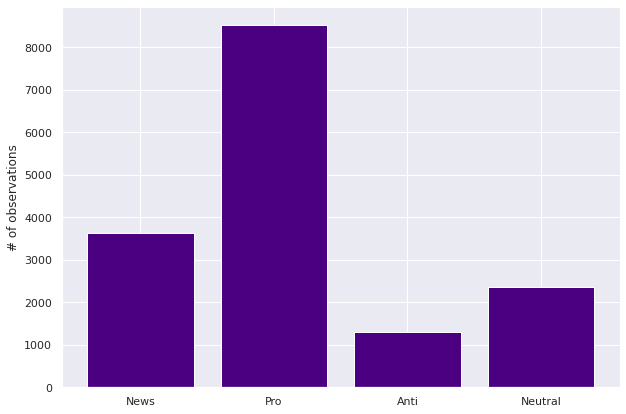

In [99]:
# Get all possible labels
labels = train_df['sentiment'].unique()
heights = [len(Anti),len(Neutral), len(Pro), len(News)]
plt.figure(figsize=(10,7))
plt.bar(labels,heights,color='indigo')
plt.xticks(labels,['Anti','Neutral','Pro','News'])
plt.ylabel("# of observations")
plt.show()

## ***Upsampling***

Here, we simply make random copies of observations in the minority class until we match the size of the majority class. Using this approach means we end up with more data.

In [100]:
# upsample 
News_upsampled = resample(News,
                          replace=True, # sample without replacement (no need to duplicate observations)
                          n_samples=len(Pro), # match number in minority class
                          random_state=50) # reproducible results

# upsample Neutral  classe
Neutral_upsampled = resample(Neutral,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= len(Pro), # match number in class_size
                          random_state=50) # reproducible results

# upsample Denier  classe
Denier_upsampled = resample(Anti,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= len(Pro), # match number in class_size
                          random_state=50) # reproducible results

# upsample Believer  classe
Believer_upsampled = resample(Pro,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples= len(Pro), # match number in class_size
                          random_state=50) # reproducible results


# Combine upsampled classes
upsampled = pd.concat([News_upsampled, Neutral_upsampled, Denier_upsampled, Believer_upsampled])

Let's print out the downsampled dataset counts and percentage:

In [101]:
print(upsampled['sentiment'].value_counts())
print(upsampled['sentiment'].value_counts() / len(train_df))

 2    8530
 0    8530
-1    8530
 1    8530
Name: sentiment, dtype: int64
 2    0.539225
 0    0.539225
-1    0.539225
 1    0.539225
Name: sentiment, dtype: float64


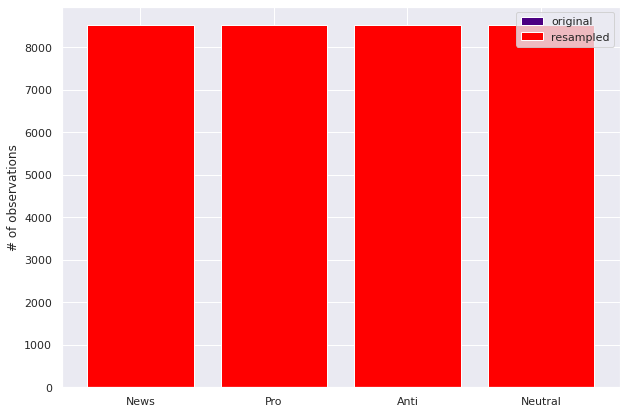

In [102]:
upsampled_heights = [len(upsampled[upsampled['sentiment']==0]),len(upsampled[upsampled['sentiment']==1]), len(upsampled[upsampled['sentiment']==-1]), len(upsampled[upsampled['sentiment']==2])]

# Get all possible labels
labels = train_df['sentiment'].unique()
plt.figure(figsize=(10,7))
plt.bar(labels,heights,color='indigo')
plt.bar(labels,upsampled_heights,color='red')
plt.xticks(labels,['Anti','Neutral','Pro','News'])
plt.ylabel("# of observations")
plt.legend(['original','resampled'])
plt.show()

# **Modelling**

**Multi-label classification** refers to those classification tasks that have two or more class labels, where one or more class labels may be predicted for each example.

In this section, we will train and predict the following popular algorithms that can be used for multi-class classification:

*   Logistic Regression
*   k-Nearest Neighbors
*   Support Vector Machine
*   Naive Bayes
*   Random Forest




**Classification Report in sklearn**
** **
Finally, reporting the classification accuracy

Examples include: 


*   Precision
*   Recall
*   F-Measure





In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
y_up =  upsampled['sentiment']
X_up =  upsampled['message']

In [105]:
# create a scaler object
scaler = preprocessing.MinMaxScaler()
# Scale data
#X_scaled = scaler.fit_transform(X)


In [106]:
# dividing X, y into train and test data
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X_up, y_up, test_size=0.2, random_state = 50)

In [107]:
vectorizer = TfidfVectorizer()
X_train_up_vect = vectorizer.fit_transform(X_train_up)
X_test_up_vect = vectorizer.transform(X_test_up)

# Scale data
scaler = preprocessing.MaxAbsScaler ()
X_train_up_scaled = scaler.fit_transform(X_train_up_vect)
X_test_up_scaled = scaler.transform(X_test_up_vect)


1.  logistic regression classification

**[Logistic regression](https://towardsdatascience.com/the-perfect-recipe-for-classification-using-logistic-regression-f8648e267592)** is a classification technique borrowed by machine learning from the field of statistics. Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The intention behind using logistic regression is to find the best fitting model to describe the relationship between the dependent and the independent variable (see the emage below adapted online [here](https://www.southampton.ac.uk/~mb1a10/stats/LogisticRegression.pdf)).





<br />

<center> <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTDv5_1rTEf4GRUrs6QpEwR0IZMnmiJ4Pbetg&usqp=CAU" width=500 height=300 />

<br />

***Training***

In [108]:
from sklearn.linear_model import LogisticRegression


In [109]:
lr = LogisticRegression(C=1, class_weight='balanced', max_iter=1000)
lr.fit(X_train_up_vect,y_train_up)

LogisticRegression(C=1, class_weight='balanced', max_iter=1000)

***Prediction***

In [110]:
y_pred1 = lr.predict(X_test_up_vect)

***Model evaluation***

* Classification Report

In [111]:
print('Classification Report Linear logistics')
print(classification_report(y_test_up, y_pred1))

Classification Report Linear logistics
              precision    recall  f1-score   support

          -1       0.94      0.97      0.95      1734
           0       0.88      0.91      0.89      1664
           1       0.90      0.81      0.85      1750
           2       0.90      0.94      0.92      1676

    accuracy                           0.90      6824
   macro avg       0.90      0.91      0.90      6824
weighted avg       0.90      0.90      0.90      6824



In [112]:
f1_lr = f1_score(y_test_up,y_pred1,average='weighted')
f1_lr

0.9037582682426618

* Confusion matrix

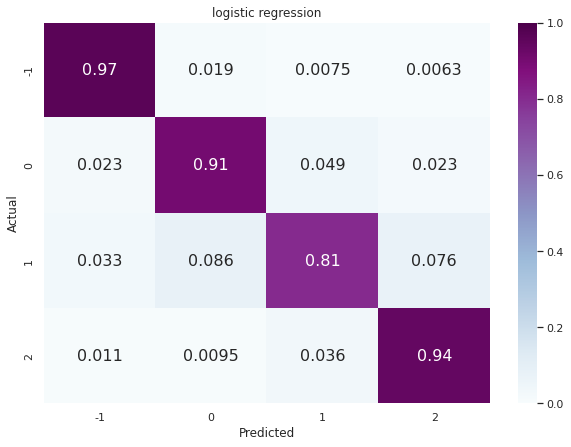

In [113]:
cm_lr = confusion_matrix(y_test_up, y_pred1)
cm_n_lr = cm_lr / cm_lr.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm_n_lr, cmap="BuPu", xticklabels=lr.classes_, yticklabels=lr.classes_, vmin=0., vmax=1., annot=True, annot_kws={"size": 16}) # font size
# Adding headings and lables
plt.title('logistic regression')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

2. Support Vector Machine



**[Support Vector Machine](https://en.wikipedia.org/wiki/Support-vector_machine)** (SVM) is a supervised machine learning algorithm that can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is a number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well (see the figure below adapted online [here](https://medium.com/@skilltohire/support-vector-machines-4d28a427ebd))

<br />

<center> <img src="https://miro.medium.com/max/1400/1*lJELcwiYWDUrPyt6JPUMWA.png" width=800 height=400 />

<br />



***Training***

In [114]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train_up_vect,y_train_up)
 

SVC()

***Prediction***

In [115]:
y_pred2 = svc.predict(X_test_up_vect)

***Model evaluation***

* Classification Report

In [116]:
print("\n\nClassification Report Support Vector Machine:\n\n", classification_report(y_test_up, y_pred2))



Classification Report Support Vector Machine:

               precision    recall  f1-score   support

          -1       0.99      1.00      0.99      1734
           0       0.96      0.97      0.96      1664
           1       0.95      0.92      0.93      1750
           2       0.95      0.97      0.96      1676

    accuracy                           0.96      6824
   macro avg       0.96      0.96      0.96      6824
weighted avg       0.96      0.96      0.96      6824



In [117]:
f1_svc = f1_score(y_test_up,y_pred2,average='weighted')
f1_svc

0.9621670831533464

* Confusion matrix

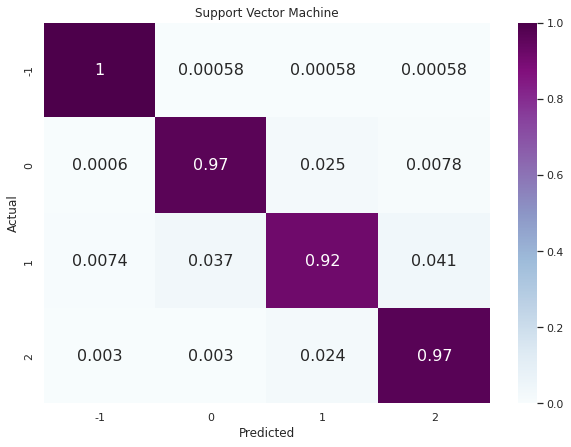

In [118]:
cm_svm = confusion_matrix(y_test_up, y_pred2)
cm_n_svm = cm_svm / cm_svm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm_n_svm, cmap="BuPu", xticklabels=svc.classes_, yticklabels=svc.classes_, vmin=0., vmax=1., annot=True, annot_kws={"size": 16}) # font size
# Adding headings and lables
plt.title('Support Vector Machine')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

3. Naive Bayes

**Naive Bayes** is a classification algorithm that uses the principle of [Bayes theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) to make classifications. The benefits of Naive Bayes are that the model is simple to build and is useful on large data sets. 

The figure below depits the Naive Bayes adapted online [here](https://towardsdatascience.com/introduction-to-na%C3%AFve-bayes-classifier-fa59e3e24aaf).

<br />

<center> <img src="https://miro.medium.com/max/1400/1*39U1Ln3tSdFqsfQy6ndxOA.png" width=800 height=400 />

<br />

Gaussian : It is used in classification and it assumes that features follow a normal distribution.

***Training***

In [119]:
# Define the model 
naive_bayes = GaussianNB()
# Fit the model 
naive_bayes.fit(X_train_up_vect.toarray(),y_train_up)

GaussianNB()

***Prediction***

In [120]:
# Get predictions on the test set 
y_pred3 = naive_bayes.predict(X_test_up_vect.toarray())

***Model evaluation***

* Classification Report

In [121]:
print("\n\nClassification Report Naive Bayes:\n\n", metrics.classification_report(y_test_up, y_pred3))



Classification Report Naive Bayes:

               precision    recall  f1-score   support

          -1       0.83      1.00      0.91      1734
           0       0.90      0.89      0.90      1664
           1       0.95      0.73      0.82      1750
           2       0.87      0.90      0.89      1676

    accuracy                           0.88      6824
   macro avg       0.89      0.88      0.88      6824
weighted avg       0.89      0.88      0.88      6824



In [122]:
f1_nb = f1_score(y_test_up,y_pred3,average='weighted')
f1_nb

0.8778959041796487

* Confusion matrix

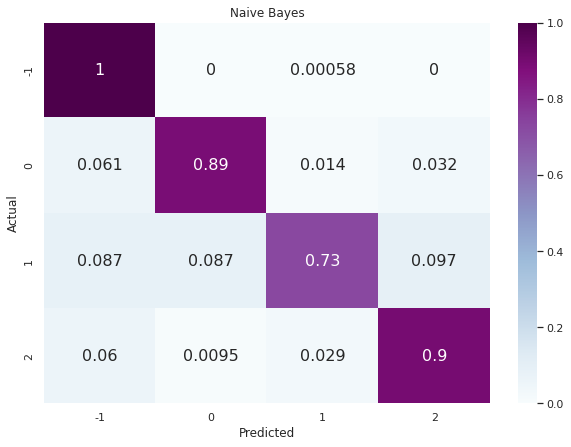

In [123]:
cm_nb = confusion_matrix(y_test_up, y_pred3)
cm_n_nb = cm_nb / cm_nb.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm_n_nb, cmap="BuPu", xticklabels=naive_bayes.classes_, yticklabels=naive_bayes.classes_, vmin=0., vmax=1., annot=True, annot_kws={"size": 16}) # font size
# Adding headings and lables
plt.title('Naive Bayes')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

4. Random Forest Classification.

**Random forests** is an averaging ensemble method for classification. The ensemble is a combination of decision trees
built from a bootstrap sample from training set. Additionally,
in building the decision tree, the split which is chosen when
splitting a node is the best split only among a random set of
features. In this section, the implementation of random forests in scikitlearn python library is used, which averages the probabilistic predictions. 

The figure below depits the Random forests adapted online [here](https://medium.com/analytics-vidhya/random-forest-classifier-and-its-hyperparameters-8467bec755f6).

<br />

<center> <img src="https://miro.medium.com/max/1400/1*hmtbIgxoflflJqMJ_UHwXw.jpeg" width=900 height=600 />

<br />

***Training***

In [124]:
# Define the model 
rf = RandomForestClassifier()
# Fit the model
rf.fit(X_train_up_vect, y_train_up)

RandomForestClassifier()

***Prediction***

In [125]:
# Get predictions on the test set
y_pred4 = rf.predict(X_test_up_vect)

***Model evaluation***

* Classification Report

In [126]:
print("\n\nClassification Report Random Forest Classification:\n\n", classification_report(y_test_up, y_pred4))



Classification Report Random Forest Classification:

               precision    recall  f1-score   support

          -1       0.99      1.00      1.00      1734
           0       0.95      0.97      0.96      1664
           1       0.96      0.88      0.92      1750
           2       0.92      0.97      0.95      1676

    accuracy                           0.95      6824
   macro avg       0.95      0.96      0.95      6824
weighted avg       0.96      0.95      0.95      6824



In [127]:
f1_rf = f1_score(y_test_up,y_pred4,average='weighted')
f1_rf

0.9543554993306489

* Confusion matrix

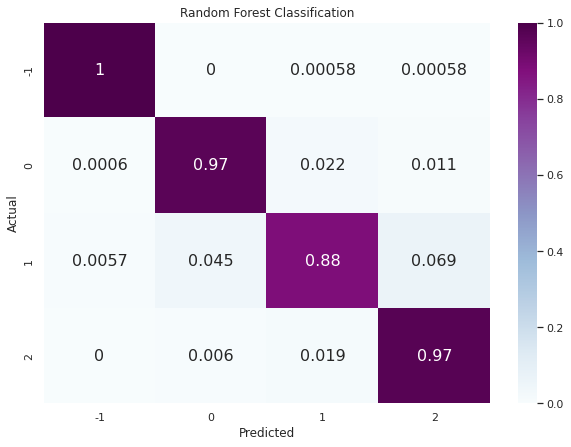

In [128]:
cm_rf = confusion_matrix(y_test_up, y_pred4)
cm_n_rf = cm_rf / cm_rf.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm_n_rf, cmap="BuPu", xticklabels=rf.classes_, yticklabels=rf.classes_, vmin=0., vmax=1., annot=True, annot_kws={"size": 16}) # font size
# Adding headings and lables
plt.title('Random Forest Classification')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

***comparing models***

Models will be compared based on their f1 scores in a tabular format and bar plot.

In [129]:
f1_scores = [f1_lr,f1_nb,f1_rf,f1_svc]
model_names = ['Logistic Regression','Naive Bayes','Random Forest','Support Vector Machine']

In [130]:
models_dic = {'model_name' : ['Logistic Regression','Naive Bayes','Random Forest','Support Vector Machine'], 'f1_score' : [f1_lr,f1_nb,f1_rf,f1_svc]}


models_dic_df = pd.DataFrame(models_dic)

In [131]:
models_dic_df.sort_values('f1_score',ascending=False)

model_name  f1_score
3  Support Vector Machine  0.962167
2           Random Forest  0.954355
0     Logistic Regression  0.903758
1             Naive Bayes  0.877896

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

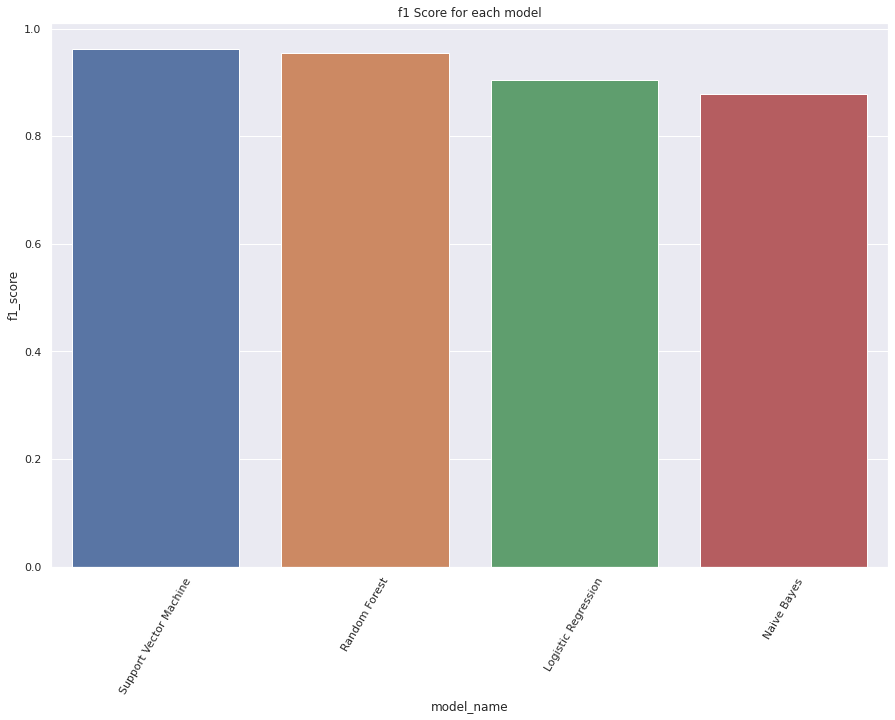

In [132]:
sns.barplot(x= 'model_name', y= 'f1_score', data = models_dic_df.sort_values('f1_score',ascending=False))
plt.title("f1 Score for each model")
plt.xticks(rotation=60)

# **Feature Engineering in test dataset**

Before we can do feature engineering in test dataset, we need to ensure that our data is in a clean format that can actually be used. 

***Let us remove all websites and replaces them with the text 'web-url'***

In [133]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
test_df['message'] = test_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [134]:
#now view the data
test_df.head()

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

***Convert to lowercase***

In [135]:
test_df['message'] = test_df['message'].str.lower() 

***Remove digits and words containing digits***

In [136]:
# To do this we use lambda functions.
test_df['message']=test_df['message'].apply(lambda x: re.sub('\w*\d\w*','', x))

***Remove punctuation removal***

In [137]:
test_df['message'] = test_df['message'].apply(punctuation_removal)

***remmoving the urls, Re Tweets, mentions, Hashtags, https, emojis, charecters***

In [138]:
#remmoving the urls
pattern_url = r'http[s]?://[A-Za-z0-9/.]+'
subs_url = r'url-web'
test_df['message']= test_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

#Makes sure only letters are in the message
pattern_url=re.sub('[^a-zA-Z]',' ',pattern_url)  
    
#remmoving the Re Tweets 
pattern_url = r'rt\s'
subs_url = r''
test_df['message'] = test_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)


#remmoving the remaining https
pattern_url = r'https:[.*?]+'
subs_url = r''
test_df['message'] = test_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

# Removing the emojis using the apply method

def remove_emojis(string):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', string)

test_df['message'] = test_df['message'].apply(remove_emojis)



#remmoving the uknown charecters from words
pattern_url = r'[^A-Za-z ]'
subs_url = r''
test_df['message'] = test_df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

***Tokenization***

In [139]:
tokenized_test_df = [word_tokenize(word) for word in test_df['message']]

In [140]:
# we will use TreebankWordTokenizer since it is much quicker than the word_tokenize function
tokeniser = TreebankWordTokenizer()
test_df['tokens'] = test_df['message'].apply(tokeniser.tokenize)

In [141]:
test_df[['message']].head()

message
0  europe will now be looking to china to make su...
1  combine this with the polling of staffers re c...
2  the scary unimpeachable evidence that climate ...
3  karoli morgfair osborneink dailykos putin got ...
4  fakewillmoore female orgasms cause global warm...

***Stemming and Lemmatization***

Stemming

In [142]:
def test_df_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [143]:
test_df['stem'] = test_df['tokens'].apply(test_df_stemmer, args=(stemmer, ))

In [144]:
# Now print what we have done so far using stemmer.

test_df[['tokens','stem']].head()

tokens  \
0  [europe, will, now, be, looking, to, china, to...   
1  [combine, this, with, the, polling, of, staffe...   
2  [the, scary, unimpeachable, evidence, that, cl...   
3  [karoli, morgfair, osborneink, dailykos, putin...   
4  [fakewillmoore, female, orgasms, cause, global...   

                                                stem  
0  [europ, will, now, be, look, to, china, to, ma...  
1  [combin, this, with, the, poll, of, staffer, r...  
2  [the, scari, unimpeach, evid, that, climat, ch...  
3  [karoli, morgfair, osborneink, dailyko, putin,...  
4  [fakewillmoor, femal, orgasm, caus, global, wa...

*Lemmatization*

In [145]:
def test_df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

In [146]:
test_df['lemma'] = test_df['tokens'].apply(test_df_lemma, args=(lemmatizer, ))

In [147]:
# Now print what we have done so far using lemmatizer.

test_df[['tokens','lemma']].head()

tokens  \
0  [europe, will, now, be, looking, to, china, to...   
1  [combine, this, with, the, polling, of, staffe...   
2  [the, scary, unimpeachable, evidence, that, cl...   
3  [karoli, morgfair, osborneink, dailykos, putin...   
4  [fakewillmoore, female, orgasms, cause, global...   

                                               lemma  
0  [europe, will, now, be, looking, to, china, to...  
1  [combine, this, with, the, polling, of, staffe...  
2  [the, scary, unimpeachable, evidence, that, cl...  
3  [karoli, morgfair, osborneink, dailykos, putin...  
4  [fakewillmoore, female, orgasm, cause, global,...

***Removing stopwords***

In [148]:
def remove_stop_words(tokens):
    return [t for t in tokens if t not in stopwords.words('english')]

In [149]:
test_df['lemma'] = test_df['tokens'].apply(remove_stop_words)

In [150]:
test_df[['tokens','lemma']].head()

tokens  \
0  [europe, will, now, be, looking, to, china, to...   
1  [combine, this, with, the, polling, of, staffe...   
2  [the, scary, unimpeachable, evidence, that, cl...   
3  [karoli, morgfair, osborneink, dailykos, putin...   
4  [fakewillmoore, female, orgasms, cause, global...   

                                               lemma  
0  [europe, looking, china, make, sure, alone, fi...  
1  [combine, polling, staffers, climate, change, ...  
2  [scary, unimpeachable, evidence, climate, chan...  
3  [karoli, morgfair, osborneink, dailykos, putin...  
4  [fakewillmoore, female, orgasms, cause, global...

# **Text feature extraction in  test dataset**

***Bag of words***

Now we create a set of dictionaries, one for each of the train_df sentiment.

In [151]:
msg2 = {}
for i in sentiment_labels:
    df = train_df.groupby('sentiment')
    msg2[i] = {}
    for row in df.get_group(i)['tokens']:
        msg2[i] = bag_of_words_count(row, msg2[i])

The next step is to create a list of all of the unique words.

In [152]:
all_words = set()
for i in sentiment_labels:
    for word in msg2[i]:
        all_words.add(word)

This was done so that we can create a combined bag of words dictionary for all the words in the text.

In [153]:
msg2['all'] = {}
for i in sentiment_labels:
    for word in all_words:
        if word in msg2[i].keys():
            if word in msg2['all']:
                msg2['all'][word] += msg2[i][word]
            else:
                msg2['all'][word] = msg2[i][word]

Now we can easily calculate how many words there are in total.

In [154]:
sum_word = sum([j for j in msg2['all'].values()])
sum_word

261687

Let's explore the frequeny of words which occur less than 10 times in the whole test dataset.

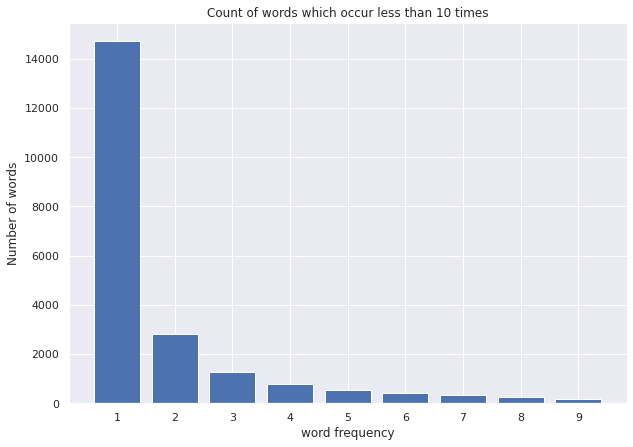

In [155]:
arr2 = np.array([j for j in msg2['all'].values() if j < 10])
labels, counts = np.unique(arr2, return_counts=True)
plt.figure(figsize=(10,7))
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.ylabel("Number of words")
plt.title("Count of words which occur less than 10 times")
plt.xlabel("word frequency")
plt.show()

Let us observe the length of words that only appear once.

In [156]:
len([i for i in msg2['all'].values() if i == 1]) # length function is used in this case

14724

Words that we think would appear once out of roughly 280 thousand words.

Let's print out a few of these rare words.


In [157]:
appear_once2 = [k for k, j in msg2['all'].items() if j==1] 
pd.DataFrame (appear_once2[:20], columns = ['rare words'])

rare words
0             waldojaquith
1                geologist
2            resourceshttp
3   globalcovenantofmayors
4                 smacking
5                    ebola
6         realconservative
7              indigocathy
8             clarebuttner
9            climateenergy
10          administrators
11                  trains
12              wilsonpark
13                khurshid
14               zachmider
15              annotation
16                  dayjob
17                  louise
18          weneedfeminlsm
19                eilfretz

In the above dataframe of rare words, some of these words dont make sence at all.

So before we remove them let us see the anount of data will be left with after the whole process.


In [158]:
print(len([j for j in msg2['all'].values() if j >= 10])) # No. words that appear more than 10 times?
occurs_more_than_10_times2 = sum([j for j in msg2['all'].values() if j >= 10]) 
print(occurs_more_than_10_times2)

2371
223144


how many words of the total does that account for?

In [159]:
occurs_more_than_10_times2/sum_word

0.8527133560322064

Employing words that appear more than 10 times seems much more useful!, thus this accounts for 85% of all the words!

Now, let's remove all words that occur less than 10 times.

In [160]:
max_count = 10
remaining_word_index = [k for k, j in msg2['all'].items() if j > max_count]

***ngrams***

Now let's combine consecutive words into groups of two using ngrams.

In [161]:
my_list2 = [x for x in ngrams(test_df['tokens'], 2)]

df2 = pd.DataFrame (my_list2)
print (df2)

                                                       0  \
0      [europe, will, now, be, looking, to, china, to...   
1      [combine, this, with, the, polling, of, staffe...   
2      [the, scary, unimpeachable, evidence, that, cl...   
3      [karoli, morgfair, osborneink, dailykos, putin...   
4      [fakewillmoore, female, orgasms, cause, global...   
...                                                  ...   
10540  [sciencenews, whats, the, cost, of, climate, c...   
10541  [brittanybohrer, brb, writing, a, poem, about,...   
10542  [the, year, climate, change, came, home, durin...   
10543  [loopvanuatu, pacific, countries, positive, ab...   
10544  [youre, so, hot, you, must, be, the, cause, fo...   

                                                       1  
0      [combine, this, with, the, polling, of, staffe...  
1      [the, scary, unimpeachable, evidence, that, cl...  
2      [karoli, morgfair, osborneink, dailykos, putin...  
3      [fakewillmoore, female, orgasms, cau

***CountVectorizer***

NLTK's CountVectorizer can be used to clean text data and extract features, transforming the text data into a matrix of numbers.

Sentiment requires a string but our “lemmatized” column is currently a list. 
Let’s convert the list into a string.

In [162]:
test_df['lemma_str'] = [' '.join(map(str,l)) for l in test_df['lemma']]
test_df[['lemma_str']].head()

lemma_str
0  europe looking china make sure alone fighting ...
1  combine polling staffers climate change womens...
2  scary unimpeachable evidence climate change al...
3  karoli morgfair osborneink dailykos putin got ...
4  fakewillmoore female orgasms cause global warm...

Fitting test data to vectorizer object

In [163]:
vect2 = CountVectorizer()
vect2.fit(test_df['message'])

CountVectorizer()

Tuning the vectorizer

Below are a few parameters that you can consider tune

In [164]:
# remove English stop words
vect2 = CountVectorizer(stop_words='english')

# include 1-grams and 2-grams
vect2 = CountVectorizer(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect2 = CountVectorizer(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect2 = CountVectorizer(min_df=2)

Now let's fit a tuned CountVectorizer to the test data.

In [165]:
betterVect2 = CountVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.5, 
                             ngram_range=(1, 1))

In [166]:
betterVect2.fit(test_df['message'])

CountVectorizer(max_df=0.5, min_df=2, stop_words='english')

# **Test data Pre-processing**

***Transforming text into numbers***

1. Features

we need to first transform the text into numbers.

To do this task we can use Count Vectorization

In [167]:
# Let's use the count vectorizer with its default hyperparameters
vect2 = CountVectorizer()
X_count2 = vect2.fit_transform(test_df['lemma_str'].values.astype(str))

In [168]:
# Let us view the shape of X_count2
X_count2.shape

(10546, 18241)

For this notebook, we will be using the top 25 words that appear most often, to make our model easier to test

In [169]:
vect_25_2 = CountVectorizer(lowercase=True, stop_words='english', max_features=25,analyzer='word', ngram_range=(1, 3))
X_count2 = vect_25_2.fit_transform(test_df['lemma_str'].values.astype(str))

In [170]:
# Let us see feature names
vect_25_2.get_feature_names()

['amp',
 'believe',
 'believe climate',
 'believe climate change',
 'change',
 'change urlweb',
 'climate',
 'climate change',
 'climate change urlweb',
 'doesnt',
 'doesnt believe',
 'dont',
 'epa',
 'global',
 'global warming',
 'going',
 'new',
 'people',
 'real',
 'shes',
 'trump',
 'urlweb',
 'urlweb urlweb',
 'warming',
 'world']

In [171]:
# Get shape of our new predictor variables
X_count2.shape

(10546, 25)

In [172]:
X2 = X_count2.toarray()

In [173]:
X2 = pd.DataFrame(X2, columns= vect_25_2.get_feature_names())

In [174]:
X2.head(3)

amp  believe  believe climate  believe climate change  change  \
0    0        0                0                       0       1   
1    0        0                0                       0       1   
2    0        0                0                       0       1   

   change urlweb  climate  climate change  climate change urlweb  doesnt  ...  \
0              1        1               1                      1       0  ...   
1              0        1               1                      0       0  ...   
2              1        1               1                      1       0  ...   

   going  new  people  real  shes  trump  urlweb  urlweb urlweb  warming  \
0      0    0       0     0     0      0       1              0        0   
1      0    0       0     0     0      0       1              0        0   
2      0    0       0     0     0      0       1              0        0   

   world  
0      0  
1      0  
2      0  

[3 rows x 25 columns]

2. Response variable

In [175]:
test_df.head(3)

message  tweetid  \
0  europe will now be looking to china to make su...   169760   
1  combine this with the polling of staffers re c...    35326   
2  the scary unimpeachable evidence that climate ...   224985   

                                              tokens  \
0  [europe, will, now, be, looking, to, china, to...   
1  [combine, this, with, the, polling, of, staffe...   
2  [the, scary, unimpeachable, evidence, that, cl...   

                                                stem  \
0  [europ, will, now, be, look, to, china, to, ma...   
1  [combin, this, with, the, poll, of, staffer, r...   
2  [the, scari, unimpeach, evid, that, climat, ch...   

                                               lemma  \
0  [europe, looking, china, make, sure, alone, fi...   
1  [combine, polling, staffers, climate, change, ...   
2  [scary, unimpeachable, evidence, climate, chan...   

                                           lemma_str  
0  europe looking china make sure alone fighting ...  
1  combine polling staffers climate change womens...  
2  scary unimpeachable evidence climate change al...

# **Submission**

In [176]:
# Traing the model with the entire data
yf = upsampled['sentiment']
Xf = upsampled['message']

In [177]:
X_testf = test_df['message']

In [178]:
# extracting features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer2 = TfidfVectorizer(ngram_range = (1,3))
V_train_Xf = vectorizer2.fit_transform(Xf)
V_test_Xf = vectorizer2.transform(X_testf)

# Import the scaler module
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()

# Scale data
X_Train_f = scaler.fit_transform(V_train_Xf)
X_Test_f = scaler.transform(V_test_Xf)

In [179]:
V_test_Xf.shape

(10546, 211198)

In [180]:
svm_model_linear_f = SVC(kernel='rbf').fit(V_train_Xf,yf)
final_preds = svm_model_linear_f.predict(V_test_Xf)

In [181]:
import pickle
with open('vectorizer_4.pkl', 'wb') as fin:
    pickle.dump(vectorizer2, fin)

In [182]:
# save the model to disk
model_name = ['SVC_linear']
models = [svm_model_linear_f]
for i in range(len(models)):
        filename = model_name[i] + '_CB5.pkl'
        pickle.dump(models[i], open(filename, 'wb'))


In [183]:
preds = [final_preds]
preds[0]

array([1, 1, 1, ..., 0, 0, 1])

In [184]:
def submissions(preds): 
    
    
    model = ['SVC_linear']
    
    for i in range(len(model)):
        daf = pd.DataFrame(preds[i], columns=['sentiment'])
        output = pd.DataFrame({"tweetid":test_df['tweetid']})
        final = output.join(daf)
        final_name = model[i] +"_CB5.csv"
        final.to_csv(final_name, index=False)
        

    return final

In [185]:
df = submissions(preds)

In [186]:
df

tweetid  sentiment
0       169760          1
1        35326          1
2       224985          1
3       476263          1
4       872928          0
...        ...        ...
10541   895714          1
10542   875167          1
10543    78329          0
10544   867455          0
10545   470892          1

[10546 rows x 2 columns]

# **Conclusion**